<a href="https://colab.research.google.com/github/SUN7870/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM을 활용한 주가 예측 모델

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')
# 기본 폰트로 되돌리기
plt.rcParams['font.family'] = 'sans-serif'

In [ ]:
#FinanceDataReader는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
import FinanceDataReader as fdr
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung=fdr.DataReader('005930')
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-08-13,76500,76600,75500,76100,10716261,0.007947
2024-08-14,77400,77800,77000,77200,13246168,0.014455
2024-08-16,79400,80200,78700,80200,22061478,0.038860
2024-08-19,80100,80100,78000,78300,14146565,-0.023691
2024-08-20,79500,79800,78700,78900,10157521,0.007663


In [ ]:
#현대자동차 005380
hyundai=fdr.DataReader('005380')
hyundai.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-08-13,242000,245500,240000,243000,358474,-0.002053
2024-08-14,245500,248000,238500,241000,500276,-0.008230
2024-08-16,248000,256500,246500,255000,1113073,0.058091
2024-08-19,256000,259500,250000,255000,739313,0.000000
2024-08-20,258000,261000,255000,256000,659108,0.003922


In [ ]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600
2024-08-15,224.600006,225.350006,222.759995,224.720001,224.720001,46414000
2024-08-16,223.919998,226.830002,223.649994,226.050003,226.050003,44340200
2024-08-19,225.720001,225.990005,223.039993,225.889999,225.889999,40639000


In [ ]:
apple = fdr.DataReader('AAPL', '2017') #2017이후의 주식데이터
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.921545,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.891415,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.028160,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.329487,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.579813,134247600


In [ ]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,1.297609,1.328022,1.287471,1.287471,0.227506,2044376
1980-01-03,1.287471,1.287471,1.267196,1.287471,0.227506,2816257
1980-01-04,1.287471,1.287471,1.272265,1.277334,0.225714,3038203
1980-01-07,1.277334,1.287471,1.267196,1.267196,0.223923,2251526
1980-01-08,1.267196,1.292540,1.257059,1.292540,0.228401,4069022


In [ ]:
ford.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,9.50,9.54,9.44,9.48,7.699969,50191200
2019-12-23,9.50,9.57,9.40,9.44,7.667478,54784400
2019-12-24,9.44,9.49,9.43,9.47,7.691847,11881600
2019-12-26,9.47,9.49,9.43,9.45,7.675602,28961300
2019-12-27,9.45,9.46,9.35,9.36,7.602501,28272800


In [ ]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'
stock=fdr.DataReader(STOCK_CODE)
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-05-02,6200,6530,6120,6280,1446713,NaN
2000-05-03,6240,6260,6090,6180,531786,-0.015924
2000-05-04,6220,6360,6140,6180,522021,0.000000
2000-05-08,6400,6700,6300,6560,1053944,0.061489
2000-05-09,6500,6540,6340,6370,1010990,-0.028963


In [ ]:
stock.index

DatetimeIndex(['2000-05-02', '2000-05-03', '2000-05-04', '2000-05-08',
               '2000-05-09', '2000-05-10', '2000-05-12', '2000-05-15',
               '2000-05-16', '2000-05-17',
               ...
               '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09',
               '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-16',
               '2024-08-19', '2024-08-20'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [ ]:
#년/월/일 쪼개기
stock['Year']=stock.index.year
stock['Month']=stock.index.month
stock['Day']=stock.index.day
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
2000-05-02,6200,6530,6120,6280,1446713,NaN,2000,5,2
2000-05-03,6240,6260,6090,6180,531786,-0.015924,2000,5,3
2000-05-04,6220,6360,6140,6180,522021,0.000000,2000,5,4
2000-05-08,6400,6700,6300,6560,1053944,0.061489,2000,5,8
2000-05-09,6500,6540,6340,6370,1010990,-0.028963,2000,5,9


In [ ]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,836 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')

Text(0.5, 0, 'price')

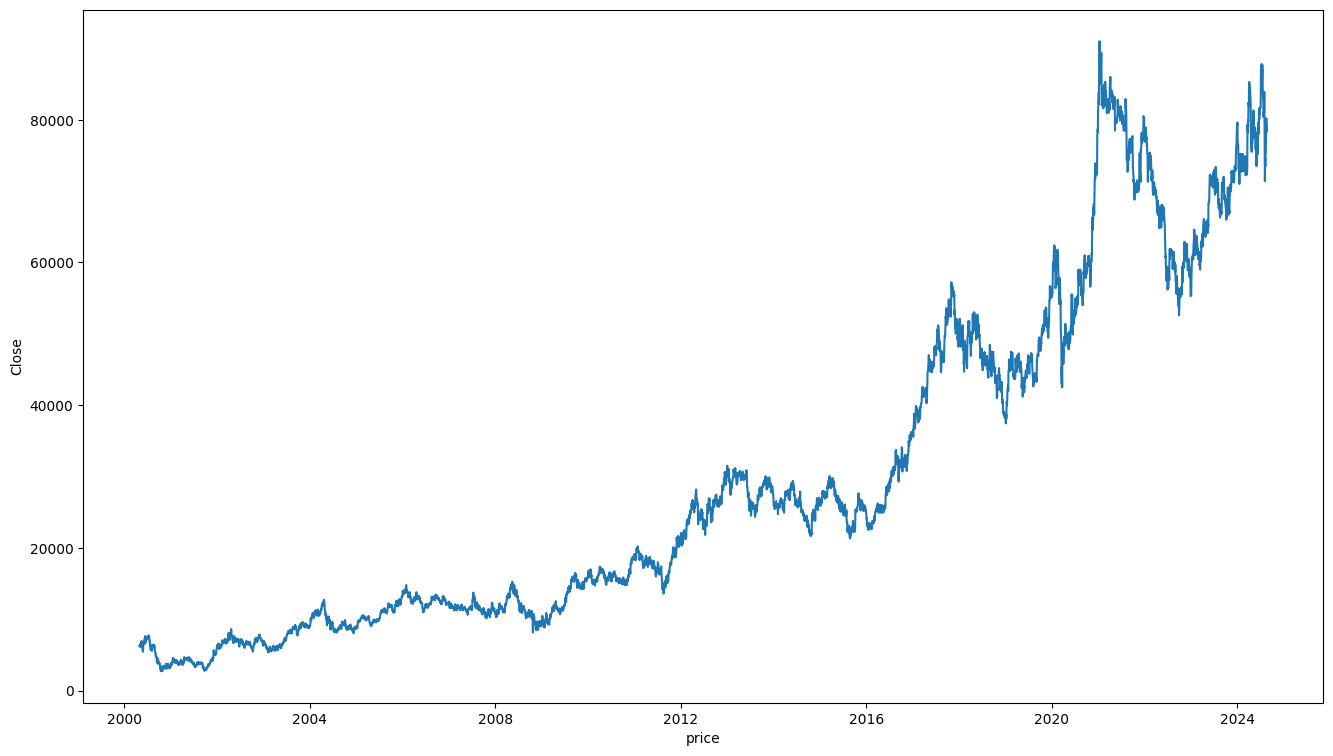

In [ ]:
#시각화
plt.figure(figsize=(16,9))
sns.lineplot(y=stock['Close'],x=stock.index)
plt.xlabel('time')
plt.xlabel('price')

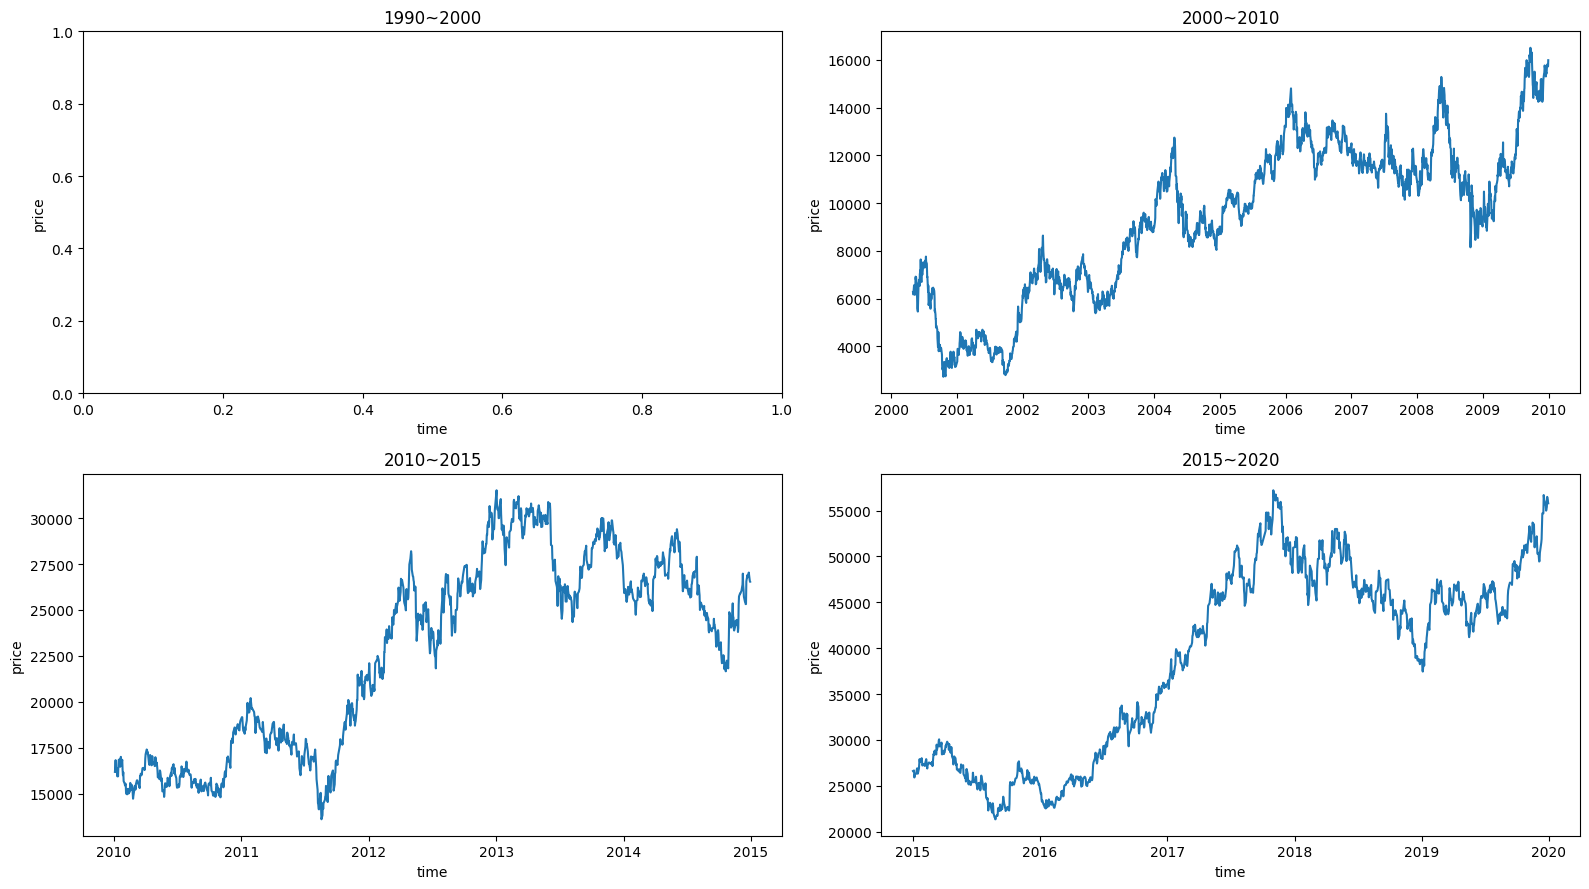

In [ ]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [ ]:
#데이터 전처리
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.06866002, 0.06745868, 0.06837989, 0.04021751, 0.01602009],
       [0.06910299, 0.06466942, 0.06804469, 0.03908463, 0.0058887 ],
       [0.06888151, 0.06570248, 0.06860335, 0.03908463, 0.00578057],
       ...,
       [0.87929125, 0.8285124 , 0.87932961, 0.87764813, 0.24429644],
       [0.88704319, 0.82747934, 0.87150838, 0.85612326, 0.15665113],
       [0.88039867, 0.82438017, 0.87932961, 0.86292058, 0.1124787 ]])

In [ ]:
df=pd.DataFrame(scaled,columns=scale_cols)
df.head()

,Open,High,Low,Close,Volume
0,0.068660,0.067459,0.068380,0.040218,0.016020
1,0.069103,0.064669,0.068045,0.039085,0.005889
2,0.068882,0.065702,0.068603,0.039085,0.005781
3,0.070875,0.069215,0.070391,0.043390,0.011671
4,0.071982,0.067562,0.070838,0.041237,0.011195


In [ ]:
#train,test분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close',axis=1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [ ]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [ ]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

TensorFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [ ]:
import tensorflow as tf

In [ ]:
#시계열 데이터를 입력받아, 윈도우 크기(window_size)만큼의 입력 데이터와
#그에 대응하는 목표 값으로 분할된 데이터셋을 생성
def windowed_dataset(series,window_size,batch_size,shuffle):
  series=tf.expand_dims(series,axis=-1) #1차원 시계열데이터->2차원으로
  ds=tf.data.Dataset.from_tensor_slices(series)#ensorFlow에서 데이터를 쉽게 다루기 위해, series라는 긴 데이터를 조각조각 나눠서 하나씩 처리할 수 있는 형태
  ds=ds.window(window_size+1,shift=1,drop_remainder=True) #4개 데이터로 다음거 예측할려면 4+1 5개를 분할애햐함
  ds=ds.flat_map(lambda w: w.batch(window_size+1)) #묶은 데이터를 더 쉽게 다룰 수 있게, 하나의 배치(batch)로
  if shuffle:
    ds=ds.shuffle(1000)
  ds=ds.map(lambda w: (w[:-1],w[-1])) #입력,타겟 데이터 분리 ex)[1,2,3] -> [1,2], 3        w[:-1]:X, w[-1]:y
  return ds.batch(batch_size).prefetch(1)

In [ ]:
#hyperparameter정의
WINDOW_SIZE=20
BATCH_SIZE=32

In [ ]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model=Sequential([
    #1차원 feature map 생성
    Conv1D(filters=32,kernel_size=5,
           padding='causal',
           activation='relu',
           input_shape=[WINDOW_SIZE,1]),
    #LSTM
    LSTM(16,activation='tanh'),
    Dense(16,activation='relu'),
    Dense(1)
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춤
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성
filename = os.path.join('tmp', 'ckeckpointer.weights.h5')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

In [ ]:
history=model.fit(train_data,validation_data=(test_data),
                  epochs=50,
                  callbacks=[checkpoint,earlystopping])

Epoch 1/50
    147/Unknown 7s 12ms/step - loss: 4.5170e-04 - mse: 9.0339e-04
Epoch 1: val_loss improved from inf to 0.00250, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 4.4589e-04 - mse: 8.9178e-04 - val_loss: 0.0025 - val_mse: 0.0050
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1400e-05 - mse: 4.2800e-05
Epoch 2: val_loss did not improve from 0.00250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 2.1565e-05 - mse: 4.3130e-05 - val_loss: 0.0027 - val_mse: 0.0053
Epoch 3/50
146/150 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4926e-05 - mse: 4.9852e-05
Epoch 3: val_loss improved from 0.00250 to 0.00246, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.5830e-05 - mse: 5.1660e-05 - val_loss: 0.0025 - val_mse: 0.0049
Epoch 4/50
147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0296e-05 - mse: 4.0592e-05
Epoch 4: val_loss improved from 0.00246 to 0.00133, saving model to tm

예측

In [ ]:
pred = model.predict(test_data)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
pred.shape

(1180, 1)

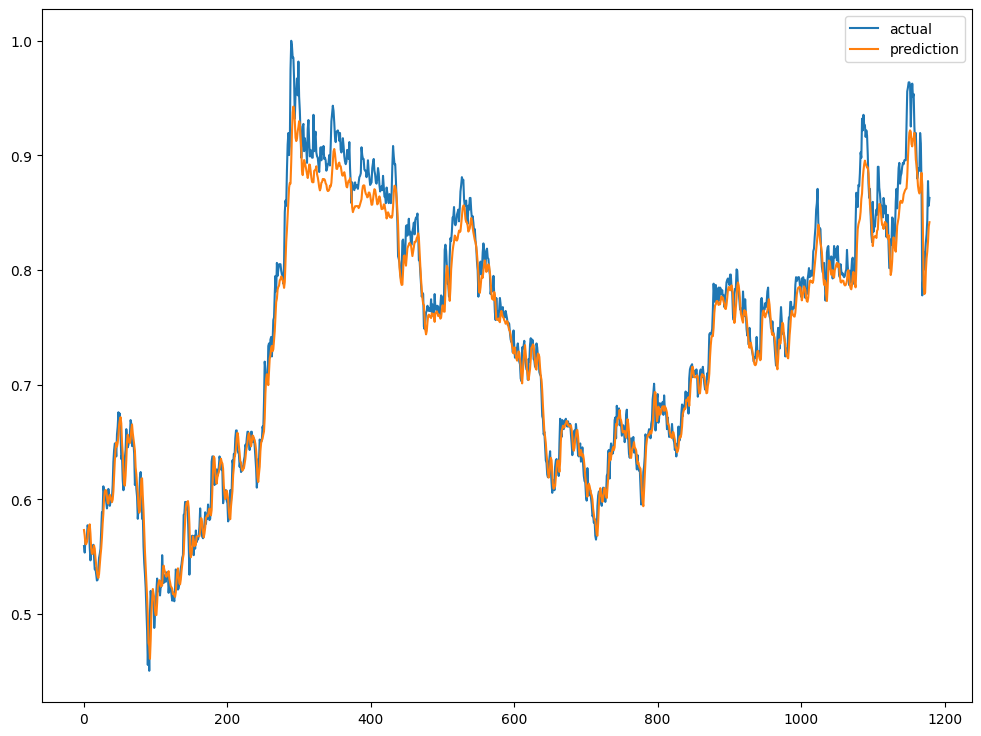

In [ ]:
#예측 데이터 시각화
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:],label='actual')
plt.plot(pred,label='prediction')
plt.legend()
plt.show()